### 미분이란?
- 곡선의 기울기(slope)
- 함수의 순간 변화율 -> 함수 f(x)에서 x가 미세하게 변할 때 f(x)값이 얼마나 민감하게 반응하는가에 관한 식

<img src= "https://raw.githubusercontent.com/jaygil8755/ML01/master/01.%20%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80/deri.gif" width="400" height="300" align='left'>   

### 편미분이란?
- 다변수 함수에서 각 변수의 변화에 따른 함수의 변화량

<img src= "https://raw.githubusercontent.com/jaygil8755/ML01/master/01.%20%EB%8B%A8%EC%88%9C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80/deriv_ex.png" width="400" height="300" align='left'>   

#### 평균제곱오차 편미분

평균제곱 오차
$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

기울기 세타1에 대한 편미분  
$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y_i})$

절편 세타0에 대한 편미분  
$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})$

[참고] MSE 편미분 http://taewan.kim/post/cost_function_derivation/

### 단순선형회귀 모델 구현하기 (순수 파이썬)
- (ChatGPT 참고) sklearn을 사용하지 않고, 파이썬으로만 단순선형회귀를 구현하는 코드를 알려주세요. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# 데이터 생성 
np.random.seed(0)  # 시드 초기화
X = np.linspace(0, 10, 100)  # 0부터 10까지의 100개의 데이터 포인트 생성
y = 2 * X + 1 + np.random.normal(0, 1, 100)  # y = 2X + 1의 관계에 노이즈 추가

In [38]:
# 초기값 및 하이퍼파라미터 설정
learning_rate = 0.01  # 학습률
epochs = 1000 # 경사 하강법 반복 횟수
n = len(X)  # 데이터 포인트 수

In [39]:
# 초기 회귀 계수 설정
slope = 0  # 초기 기울기
intercept = 0  # 초기 절편

In [40]:
# 경사하강법 수행
for i in range(epochs):
    y_pred = slope * X + intercept  # 현재 회귀선에 대한 예측값 계산
    error = y_pred - y  # 예측 오차 계산
    
    # 기울기와 절편의 편미분 계산
    gradient_slope = (2/n) * np.sum(error * X)
    gradient_intercept = (2/n) * np.sum(error)
    
    # 기울기와 절편 업데이트
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept
    
    if i % 100 == 0: # 100번 반복될 때마다 현재 상태 출력
        print(f"epochs={i} 기울기={slope:.4f} 절편={intercept:.4f} \
        기울기 편미분={gradient_slope:.4f} 절편 편미분={gradient_intercept:.4f}")

epochs=0 기울기=1.4410 절편=0.2212         기울기 편미분=-144.0993 절편 편미분=-22.1196
epochs=100 기울기=2.0514 절편=0.6688         기울기 편미분=0.0405 절편 편미분=-0.2692
epochs=200 기울기=2.0196 절편=0.8804         기울기 편미분=0.0246 절편 편미분=-0.1637
epochs=300 기울기=2.0003 절편=1.0090         기울기 편미분=0.0150 절편 편미분=-0.0995
epochs=400 기울기=1.9885 절편=1.0872         기울기 편미분=0.0091 절편 편미분=-0.0605
epochs=500 기울기=1.9814 절편=1.1347         기울기 편미분=0.0055 절편 편미분=-0.0368
epochs=600 기울기=1.9770 절편=1.1636         기울기 편미분=0.0034 절편 편미분=-0.0224
epochs=700 기울기=1.9744 절편=1.1812         기울기 편미분=0.0020 절편 편미분=-0.0136
epochs=800 기울기=1.9728 절편=1.1919         기울기 편미분=0.0012 절편 편미분=-0.0083
epochs=900 기울기=1.9718 절편=1.1984         기울기 편미분=0.0008 절편 편미분=-0.0050


In [41]:
# 회귀 계수 출력
print(f"회귀 계수 (기울기): {slope:.3f}")
print(f"절편: {intercept:.3f}")

회귀 계수 (기울기): 1.971
절편: 1.202


In [16]:
# 테스트 데이터 예측
y_pred = slope * X + intercept
y_pred

array([ 1.20847145,  1.40748835,  1.60650525,  1.80552215,  2.00453905,
        2.20355595,  2.40257285,  2.60158975,  2.80060665,  2.99962355,
        3.19864045,  3.39765735,  3.59667425,  3.79569115,  3.99470805,
        4.19372495,  4.39274185,  4.59175875,  4.79077565,  4.98979255,
        5.18880945,  5.38782636,  5.58684326,  5.78586016,  5.98487706,
        6.18389396,  6.38291086,  6.58192776,  6.78094466,  6.97996156,
        7.17897846,  7.37799536,  7.57701226,  7.77602916,  7.97504606,
        8.17406296,  8.37307986,  8.57209676,  8.77111366,  8.97013056,
        9.16914746,  9.36816436,  9.56718126,  9.76619816,  9.96521506,
       10.16423196, 10.36324886, 10.56226576, 10.76128266, 10.96029957,
       11.15931647, 11.35833337, 11.55735027, 11.75636717, 11.95538407,
       12.15440097, 12.35341787, 12.55243477, 12.75145167, 12.95046857,
       13.14948547, 13.34850237, 13.54751927, 13.74653617, 13.94555307,
       14.14456997, 14.34358687, 14.54260377, 14.74162067, 14.94

In [18]:
!pip install koreanize_matplotlib

     ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
     -- ------------------------------------- 0.4/7.9 MB 8.3 MB/s eta 0:00:01
     ---- ----------------------------------- 0.8/7.9 MB 8.9 MB/s eta 0:00:01
     ------- -------------------------------- 1.4/7.9 MB 11.1 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/7.9 MB 11.1 MB/s eta 0:00:01
     ------------ --------------------------- 2.4/7.9 MB 11.0 MB/s eta 0:00:01
     -------------- ------------------------- 3.0/7.9 MB 11.1 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/7.9 MB 11.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/7.9 MB 11.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/7.9 MB 11.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/7.9 MB 11.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/7.9 MB 11.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/7.9 MB 11.2 

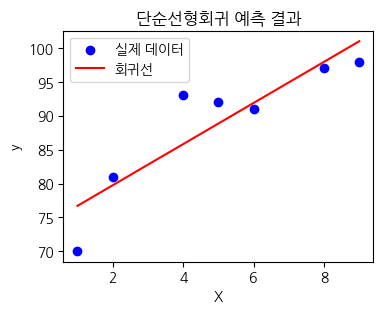

In [76]:
# 예측 결과 시각화
import koreanize_matplotlib
plt.figure(figsize=(4,3))
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('단순선형회귀 예측 결과')
plt.show()

### [실전 문제] 공부 시간 X와 성적 Y의 데이터가 다음과 같을 때 선형회귀를 구현해보세요.
- 예) 1시간일 때 70점, 2시간일 때 81점, 4시간일 때 93점....   
`data = [[1,70], [2, 81],[4, 93], [5, 92], [6, 91], [8, 97], [9, 98]]`

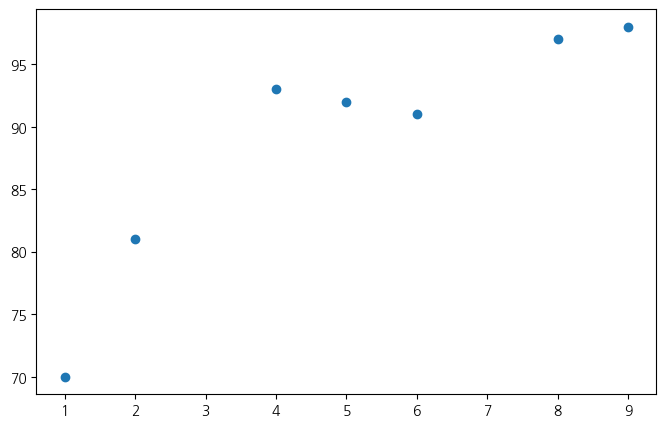

In [49]:
# 데이터 준비

data = [[1,70], [2, 81],[4, 93], [5, 92], [6, 91], [8, 97], [9, 98]]

X = [i[0] for i in data] # 리스트 안 for 문 
y = [i[1] for i in data] # [ 표현식 for 항목 in 리스트 or 튜플 if 조건문 ]

# 그래프로 나타내기
plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.show()

In [61]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
X = np.array(X)
y = np.array(y)

In [54]:
# 초기값 및 하이퍼파라미터 설정
learning_rate = 0.01  # 학습률
epochs = 5000 # 경사 하강법 반복 횟수
n = len(X)  # 데이터 포인트 수
# 초기 회귀 계수 설정
slope = 0  # 초기 기울기
intercept = 0  # 초기 절편

In [55]:
# 경사하강법 수행
for i in range(epochs):
    y_pred = slope * X + intercept  # 현재 회귀선에 대한 예측값 계산
    error = y_pred - y  # 예측 오차 계산
    
    # 기울기와 절편의 편미분 계산
    gradient_slope = (2/n) * np.sum(error * X)
    gradient_intercept = (2/n) * np.sum(error)
    
    # 기울기와 절편 업데이트
    slope -= learning_rate * gradient_slope
    intercept -= learning_rate * gradient_intercept
    
    if i % 100 == 0: # 100번 반복될 때마다 현재 상태 출력
        print(f"epochs={i} 기울기={slope:.4f} 절편={intercept:.4f} \
        기울기 편미분={gradient_slope:.4f} 절편 편미분={gradient_intercept:.4f}")

epochs=0 기울기=9.3371 절편=1.7771         기울기 편미분=-933.7143 절편 편미분=-177.7143
epochs=100 기울기=10.0930 절편=28.2265         기울기 편미분=3.1707 절편 편미분=-20.4222
epochs=200 기울기=7.5437 절편=44.6470         기울기 편미분=2.0249 절편 편미분=-13.0421
epochs=300 기울기=5.9156 절편=55.1334         기울기 편미분=1.2931 절편 편미분=-8.3290
epochs=400 기울기=4.8759 절편=61.8302         기울기 편미분=0.8258 절편 편미분=-5.3191
epochs=500 기울기=4.2119 절편=66.1070         기울기 편미분=0.5274 절편 편미분=-3.3969
epochs=600 기울기=3.7878 절편=68.8382         기울기 편미분=0.3368 절편 편미분=-2.1693
epochs=700 기울기=3.5170 절편=70.5825         기울기 편미분=0.2151 절편 편미분=-1.3854
epochs=800 기울기=3.3441 절편=71.6964         기울기 편미분=0.1374 절편 편미분=-0.8847
epochs=900 기울기=3.2336 절편=72.4077         기울기 편미분=0.0877 절편 편미분=-0.5650
epochs=1000 기울기=3.1631 절편=72.8620         기울기 편미분=0.0560 절편 편미분=-0.3608
epochs=1100 기울기=3.1181 절편=73.1521         기울기 편미분=0.0358 절편 편미분=-0.2304
epochs=1200 기울기=3.0893 절편=73.3374         기울기 편미분=0.0228 절편 편미분=-0.1472
epochs=1300 기울기=3.0709 절편=73.4557         기울기 편미분=0.0146 절편 편미분=-0.09

In [56]:
# 테스트 데이터 예측
y_pred = slope * X + intercept
y_pred

array([ 76.70329669,  79.74175823,  85.81868131,  88.85714285,
        91.89560439,  97.97252748, 101.01098902])

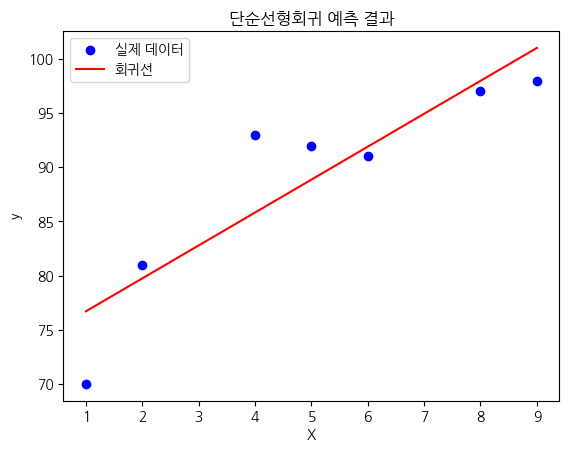

In [57]:
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('단순선형회귀 예측 결과')
plt.show()

#### 하이퍼파라미터 변경 하여 성능 높이기


### sklearn 라이브러리로 단순 선형회귀 구현하기
- linear regression

In [58]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [67]:
data = [[1,70], [2, 81],[4, 93], [5, 92], [6, 91], [8, 97], [9, 98]]

X = np.array([i[0] for i in data])  
y = np.array([i[1] for i in data])  

In [68]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 4 5 6 8 9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
X_data = X.reshape(-1,1)  
y_data = y.reshape(-1, 1)
print(X_data)
print(y_data)

[[1]
 [2]
 [4]
 [5]
 [6]
 [8]
 [9]]
[[70]
 [81]
 [93]
 [92]
 [91]
 [97]
 [98]]


In [71]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(X_data,y_data)

LinearRegression()

In [72]:
# 3시간 공부했을 때 점수는?
reg.predict([[3]])

array([[82.78021978]])

In [73]:
reg.coef_

array([[3.03846154]])

In [74]:
reg.intercept_

array([73.66483516])

In [78]:
y_pred = reg.coef_ * X_data + reg.intercept_

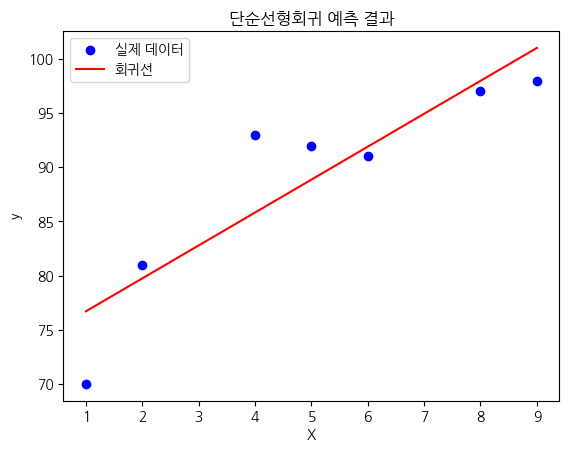

In [79]:
# 시각화
plt.scatter(X_data, y_data, color='blue', label='실제 데이터')
plt.plot(X_data, y_pred, color='red', label='회귀선')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('단순선형회귀 예측 결과')
plt.show()